# Practice sessions - Course 1 and Course 3  
## CART Trees and Random Forests - Jean‐Michel POGGI  
### Master 2 Course in Statistics  
### Universidad de la República – Facultad de Ingeniería, Montevideo, Uruguay
### February 2018 

#### Guide for the practice sessions with the companion scenario, the documentation [cran.r-project.org/web/packages/VSURF/index.html](cran.r-project.org/web/packages/VSURF/index.html) and the two articles: [journal.r-project.org/archive/2015-2/genuer-poggi-tuleaumalot.pdf](journal.r-project.org/archive/2015-2/genuer-poggi-tuleaumalot.pdf) [hal-descartes.archives-ouvertes.fr/hal-01387654v2](hal-descartes.archives-ouvertes.fr/hal-01387654v2)

---

> **Student:** Guzmán López Orrego
>
> **Contact:** guzilop@gmail.com

---

## 1. Data

#### 1. Load the library **kernlab**

> The **kernlab** library in `R` will be used only to load the **spam** dataset.

In [9]:
# Load library
library(kernlab)

#### 2. Load the dataset **spam** in R and build the dataframes of learning and test sets (the first will be used for designing trees, the second for evaluating errors)

In [10]:
# Load data
data(spam)

In [11]:
# Explore the spam dataset
?spam

spam {kernlab},R Documentation


In [88]:
# See the spam dataset structure
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

> To continue exploring the **spam** dataset, the **tidiverse** library will be loaded into the `R` environment. It will be used to manipulate and visualize data. 

In [89]:
library(tidyverse)

> Establish manual colors from Monokai palette to use in plots and as a general theme

In [87]:
lightgray <- "#75715E"
gray <- "#4D4D4D"
darkgray <- "#272822"
red <- "#C72259"
orange <- "#C97C16"
green <- "#81B023"
purple <- "#8F66CC"
blue <- "#53A8BD"

> Create the function called `boxplotOfSpamVars` to build a boxplots of any variable/s selected from the spam dataset

In [110]:
boxplotOfSpamVars <- function(vars) {
    
    # Reshape the spam data to make a boxplot 
    spam.gather <- spam %>% select(c("type", vars)) %>% gather(key = "var", value = "values", -type)

    # Create a boxplot of every variable separeted by the variable type (spam and nonspam)
    spam.boxplot <- ggplot() + 
    geom_boxplot(data = spam.gather, aes(x = var, y = values, color = type), lwd = 0.25, alpha = 0.5) + 
    scale_color_manual(values = c(green, red), name = "type")
    
    # Create faceting
    spam.boxplot + facet_grid(var ~ ., scales = "free")
}


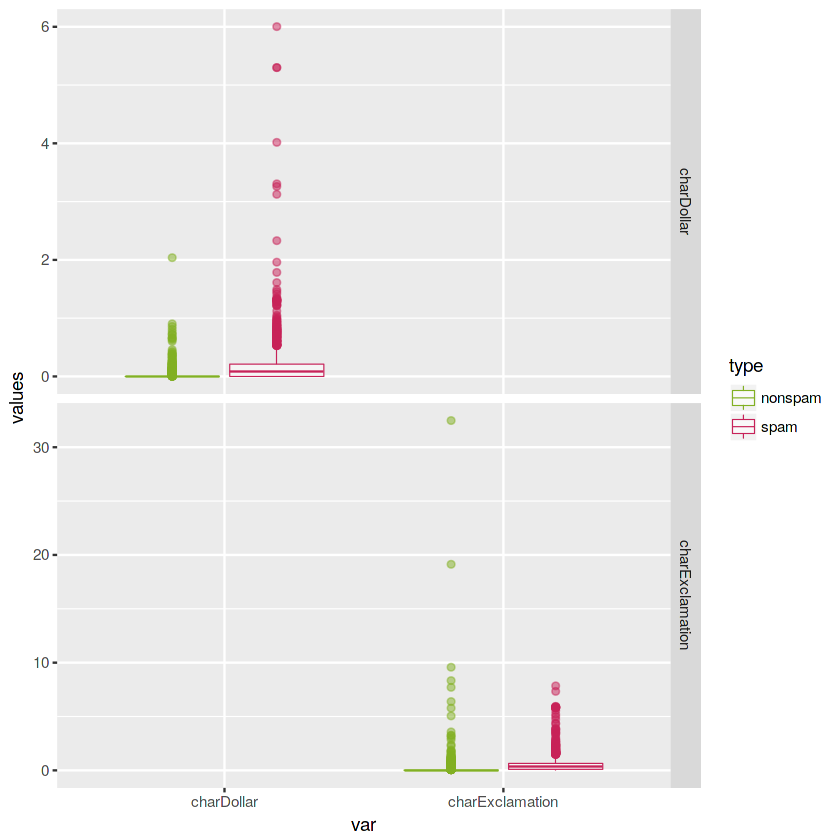

In [113]:
# Explore charDollar and charExclamation variables
boxplotOfSpamVars(vars = c("charDollar", "charExclamation"))

> It seems that the dollar symbol (*charDollar*) is more frequent in spam mails than in non-spam mails. Also, the behaviour is the same for the exclamation symbol (*charExclamation*).

In [114]:
# Build dataframes with stratified sampling
set.seed(20)

# Add id column to spam data.frame
spam$ID <- 1:nrow(spam)

# Train data.frame
train <- 
  spam %>%
  group_by(type) %>%
  sample_frac(0.70)

# Test data.frame
test <- spam[-train$ID, ]

# Remove ID column
train <- train[, -59]
test <- test[, -59]

> The learn dataset is the called `train` dataset

## 2. CART trees

### 1. Load the library **rpart**

In [115]:
library(rpart)

> The *rpart* library is ...

### 2. Compute the default tree provided by **rpart**

In [7]:
# Default rpart tree with learn data
fit.learn.def <- rpart(type ~ ., data = learn)

In [8]:
# Depth of the default rpart tree
depth.def <- max(rpart:::tree.depth(as.numeric(rownames(fit.learn.def$frame))))
cat(paste0("depth of default rpart tree: ", depth.def))

depth of default rpart tree: 5

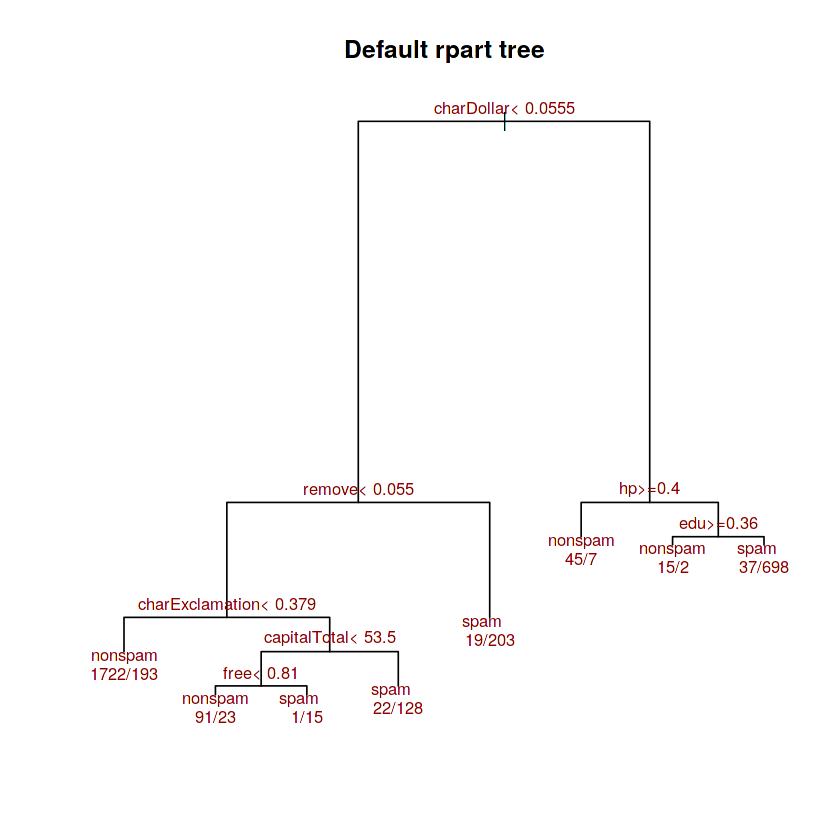

In [9]:
plot(fit.learn.def, uniform = FALSE, main = "Default rpart tree")
text(fit.learn.def, cex = 0.8, use.n = TRUE, xpd = TRUE, col = "darkred")

### 3. Build a tree of depth 1 (stump) and draw it

In [10]:
fit.learn.d1 <- rpart(type ~ ., data = learn, maxdepth = 1)

# Check the epth of the 1d tree
depth.d1 <- max(rpart:::tree.depth(as.numeric(rownames(fit.learn.d1$frame))))
cat(paste0("depth of tree: ", depth.d1))

depth of tree: 1

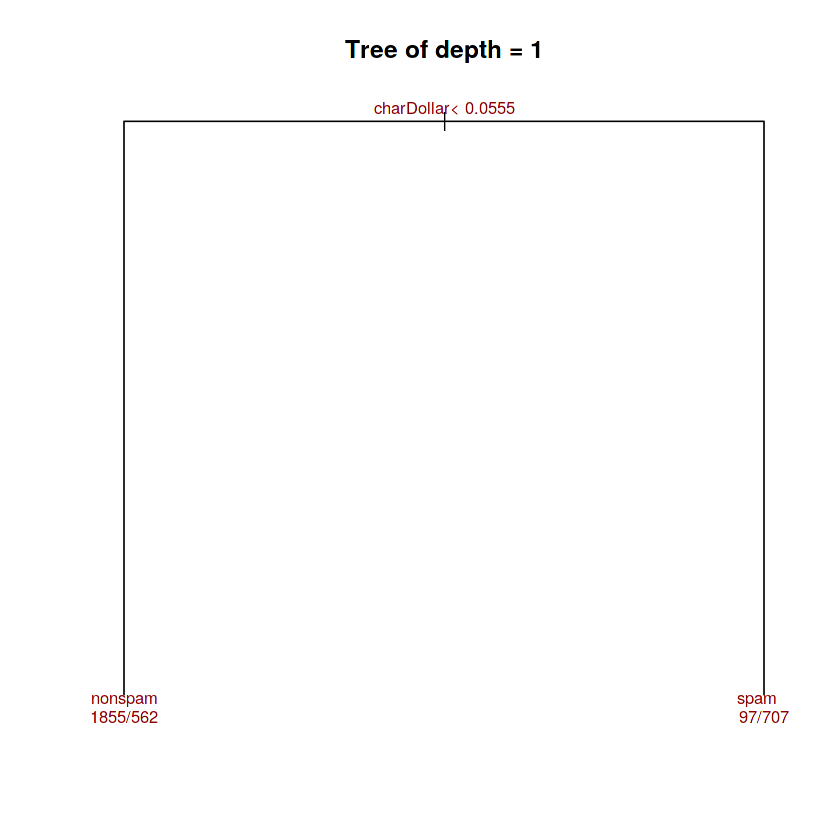

In [11]:
plot(fit.learn.d1, uniform = FALSE, main = "Tree of depth = 1")
text(fit.learn.d1, cex = 0.8, use.n = TRUE, xpd = TRUE, col = "darkred")

### 4. Examine splits primary splits and surrogate splits

In [12]:
summary(fit.learn.d1)

Call:
rpart(formula = type ~ ., data = learn, maxdepth = 1)
  n= 3221 

         CP nsplit rel error    xerror       xstd
1 0.4806935      0 1.0000000 1.0000000 0.02185313
2 0.0100000      1 0.5193065 0.5555556 0.01849238

Variable importance
 charDollar      num000       money capitalLong      credit      remove 
         48          16          14           7           7           7 

Node number 1: 3221 observations,    complexity param=0.4806935
  predicted class=nonspam  expected loss=0.393977  P(node) =1
    class counts:  1952  1269
   probabilities: 0.606 0.394 
  left son=2 (2417 obs) right son=3 (804 obs)
  Primary splits:
      charDollar      < 0.0555 to the left,  improve=504.8439, (0 missing)
      charExclamation < 0.0795 to the left,  improve=502.7630, (0 missing)
      remove          < 0.01   to the left,  improve=427.4809, (0 missing)
      free            < 0.075  to the left,  improve=386.5452, (0 missing)
      your            < 0.605  to the left,  improve=377.35

In [13]:
fit.learn.d1$splits

,count,ncat,improve,index,adj
charDollar,3221,-1,504.8438706,0.0555,0.0000000
charExclamation,3221,-1,502.7630189,0.0795,0.0000000
remove,3221,-1,427.4808712,0.0100,0.0000000
free,3221,-1,386.5452222,0.0750,0.0000000
your,3221,-1,377.3568215,0.6050,0.0000000
num000,0,-1,0.8366967,0.0750,0.3457711
money,0,-1,0.8255200,0.0450,0.3009950
capitalLong,0,-1,0.7895064,71.5000,0.1567164
credit,0,-1,0.7879541,0.0200,0.1504975
remove,0,-1,0.7870227,0.0100,0.1467662


### 5. Build a maximal tree and draw it

In [52]:
fit.learn.max <- rpart(type ~ ., data = learn, cp = 0, minsplit = 1)

# Depth of the maximal tree
depth.max <- max(rpart:::tree.depth(as.numeric(rownames(fit.learn.max$frame))))
cat(paste0("depth of maximal tree: ", depth.max))

depth of maximal tree: 30

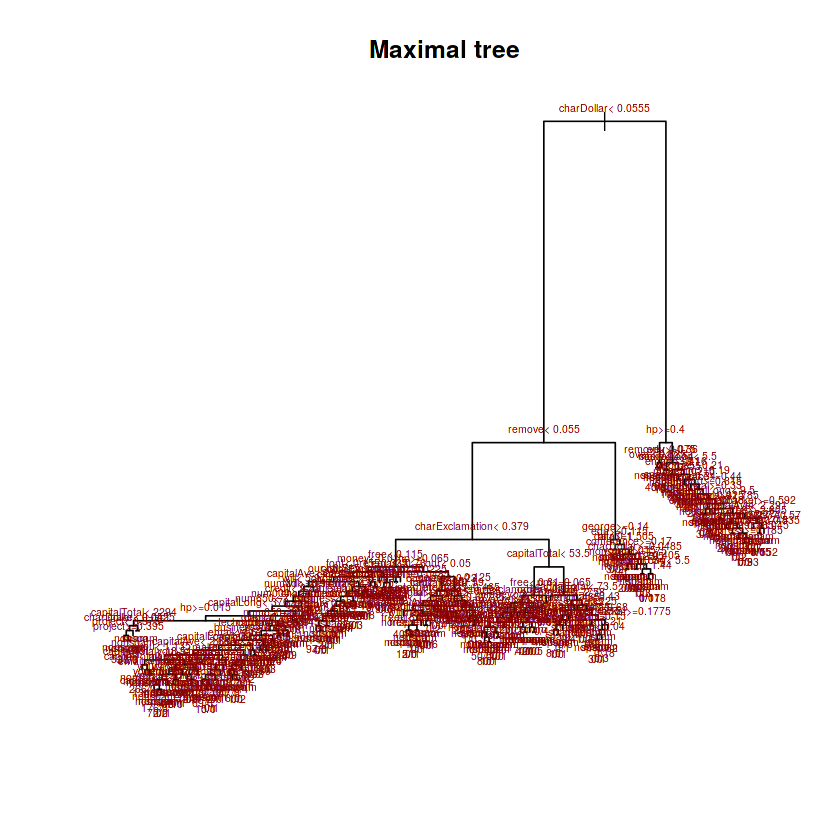

In [53]:
plot(fit.learn.max, uniform = FALSE, main = "Maximal tree")
text(fit.learn.max, cex = 0.5, use.n = TRUE, xpd = TRUE, col = "darkred")

### 6. Draw the OOB errors of the Breiman’s sequence of the pruned subtrees of the maximal tree and interpret it

In [16]:
printcp(fit.learn.max)


Classification tree:
rpart(formula = type ~ ., data = learn, cp = 0, minsplit = 0)

Variables actually used in tree construction:
 [1] address          all              business         capitalAve      
 [5] capitalLong      capitalTotal     charDollar       charExclamation 
 [9] charHash         charRoundbracket charSemicolon    conference      
[13] credit           cs               data             edu             
[17] email            font             free             george          
[21] hp               hpl              internet         mail            
[25] make             meeting          money            num000          
[29] num1999          num3d            num650           order           
[33] original         our              over             people          
[37] pm               project          re               remove          
[41] report           technology       will             you             
[45] your            

Root node error: 1269/3221 = 0.39398

n= 32

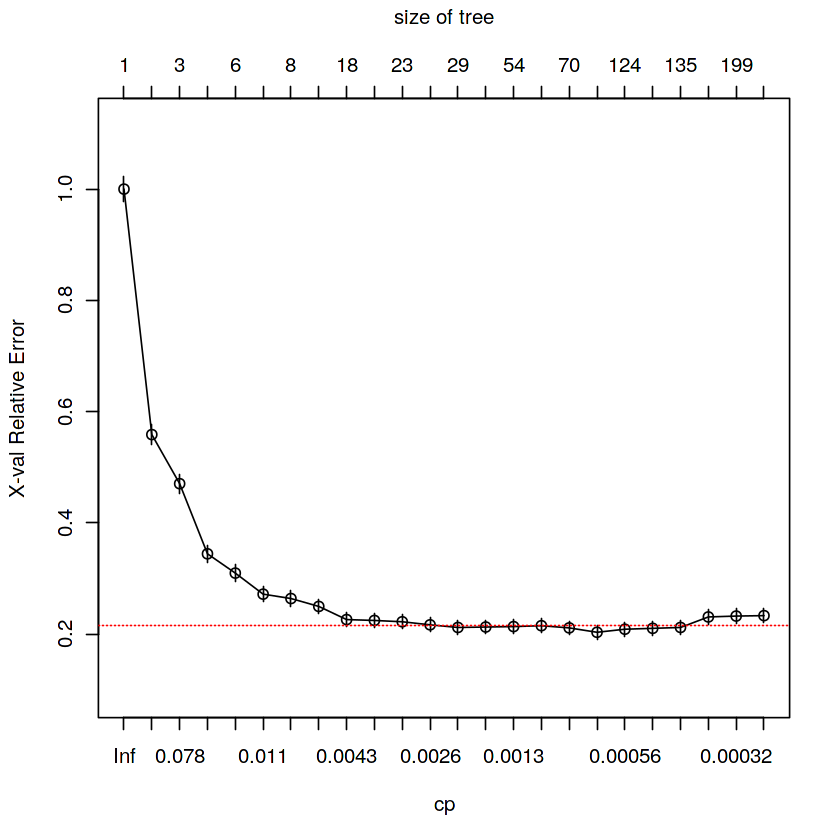

In [17]:
plotcp(fit.learn.max, col = "red")

### 7. Find the best of them in the sense of an estimate given by the cross-validation prediction error

In [18]:
fit.learn.best.cv.cp <- fit.learn.max$cptable[which.min(fit.learn.max$cptable[, "xerror"]), "CP"]
fit.learn.pruned.cv <- prune(fit.learn.max, cp = fit.learn.best.cv.cp)

### 8. Compare the default tree of rpart with the one obtained by minimizing the prediction error. Same question with the one obtained by applying the 1 SE rule

In [19]:
# xerror < min(xerror) + xstd
level.1se <- (which(fit.learn.max$cptable[, "xerror"] < min(fit.learn.max$cptable[, "xerror"]) + fit.learn.max$cptable[, "xstd"]))[1]

fit.learn.best.1se.cp <- fit.learn.max$cptable[level.1se, "CP"]
fit.learn.pruned.1se <- prune(fit.learn.max, cp = fit.learn.best.1se.cp)

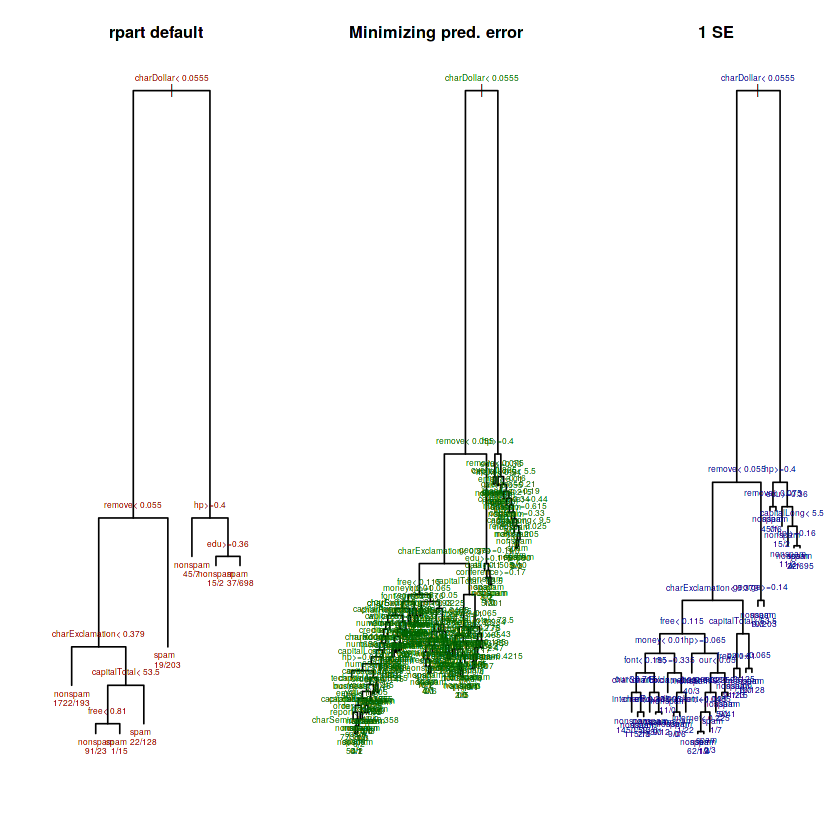

In [20]:
par(mfrow = c(1, 3))

plot(fit.learn.def, uniform = FALSE, main = "rpart default")
text(fit.learn.def, cex = 0.6, use.n = TRUE, xpd = TRUE, col = "darkred")

plot(fit.learn.pruned.cv, uniform = FALSE, main = "Minimizing pred. error")
text(fit.learn.pruned.cv, cex = 0.6, use.n = TRUE, xpd = TRUE, col = "darkgreen")

plot(fit.learn.pruned.1se, uniform = FALSE, main = "1 SE")
text(fit.learn.pruned.1se, cex = 0.6, use.n = TRUE, xpd = TRUE, col = "darkblue")

par(mfrow = c(1, 1))

### 9. Compare the errors of the different trees obtained, both in learning and in test

#### Missclasification error of default **rpart** tree

In [21]:
def.error <- test %>% 
 mutate(pred = predict(fit.learn.def, test, type = "class"),    
        error = ifelse(pred != type, 1, 0))

(def.missc_error <- def.error %>% 
 summarize(missc_error = mean(error)))

missc_error
0.09637681


#### Missclasification error of tree depth = 1

#### Maximal tree from test data

In [22]:
d1.error <- test %>% 
 mutate(pred = predict(fit.learn.d1, test, type = "class"),    
        error = ifelse(pred != type, 1, 0))

(d1.missc_error <- d1.error %>% 
 summarize(missc_error = mean(error)))

missc_error
0.2101449


#### Missclasification error of maximal tree 

In [23]:
max.error <- test %>% 
 mutate(pred = predict(fit.learn.max, test, type = "class"),    
        error = ifelse(pred != type, 1, 0))

(max.missc_error <- max.error %>% 
 summarize(missc_error = mean(error)))

missc_error
0.08768116


#### Missclasification error of best CV tree model

In [24]:
cv.error <- test %>% 
 mutate(pred = predict(fit.learn.pruned.cv, test, type = "class"),    
        error = ifelse(pred != type, 1, 0))

(cv.missc_error <- cv.error %>% 
 summarize(missc_error = mean(error)))

missc_error
0.07681159


#### Missclasification error of 1SE tree model

In [25]:
se.error <- test %>% 
 mutate(pred = predict(fit.learn.pruned.1se, test, type = "class"),    
        error = ifelse(pred != type, 1, 0))

(se.missc_error <- se.error %>% 
 summarize(missc_error = mean(error)))

missc_error
0.07971014


## 3. Random Forests

### 1. Load the library randomForest

In [26]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine



### 2. Build a RF for mtry=p (unpruned bagging) and calculate the gain in terms of error with respect to a single tree

In [27]:
#?randomForest

In [28]:
(rf.mtry.p <- randomForest(type ~ ., data = learn, mtry = ncol(learn) - 1))


Call:
 randomForest(formula = type ~ ., data = learn, mtry = ncol(learn) -      1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 57

        OOB estimate of  error rate: 5.68%
Confusion matrix:
        nonspam spam class.error
nonspam    1870   82  0.04200820
spam        101 1168  0.07959023

#### Missclasification error from the Random Forest model

In [29]:
# Predict
#pred.rf.mtry.p <- predict(rf.mtry.p, test)
#table(pred.rf.mtry.p, test$type)
# calculate accuracy pred.rf.mtry.p
#sum(diag(table(pred.rf.mtry.p, test$type))) / nrow(test) # 0.95% of accuracy

In [30]:
rf.mtry.p.error <- test %>% 
 mutate(pred = predict(rf.mtry.p, test, type = "class"),    
        gain = ifelse(pred == type, 1, 0),
        error = ifelse(pred != type, 1, 0))

(rf.mtry.p.missc_error <- rf.mtry.p.error %>% 
 summarize(gain = mean(gain),
           missc_error = mean(error)))

gain,missc_error
0.9514493,0.04855072


### 3. Build a default RF

In [31]:
(rf.def <- randomForest(type ~ ., data = learn))


Call:
 randomForest(formula = type ~ ., data = learn) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 5.03%
Confusion matrix:
        nonspam spam class.error
nonspam    1892   60  0.03073770
spam        102 1167  0.08037825

### 4. Calculate an estimate of the prediction error and compare it to bagging

In [32]:
rf.def.error <- test %>% 
 mutate(pred = predict(rf.def, test, type = "class"),    
        gain = ifelse(pred == type, 1, 0),
        error = ifelse(pred != type, 1, 0))

(rf.def.missc_error <- rf.def.error %>% 
 summarize(gain = mean(gain),
           missc_error = mean(error)))

gain,missc_error
0.957971,0.04202899


### 5. Study the evolution of the OOB error with respect to ntree using do.trace

In [47]:
#rf.def.trace <- randomForest(type ~ ., data = learn, do.trace = TRUE)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


## 4. Variable importance

### 1. Calculate the variable importance of the spam variables for the default RF

In [34]:
# ?importance
imp.def <- as.data.frame(importance(rf.def))
imp.def$variable <- rownames(imp.def)

# See top 20 most important variables
arrange(imp.def, desc(MeanDecreaseGini))[1:20,]

MeanDecreaseGini,variable
196.78870,charExclamation
135.09368,charDollar
114.68567,remove
97.06415,your
95.90479,capitalAve
90.65938,capitalLong
89.62376,free
68.21056,hp
61.50052,capitalTotal
52.57840,money


### 2. What are the most important variables?

**Answer:** charExclamation, charDollar, remove

Selecting by importance


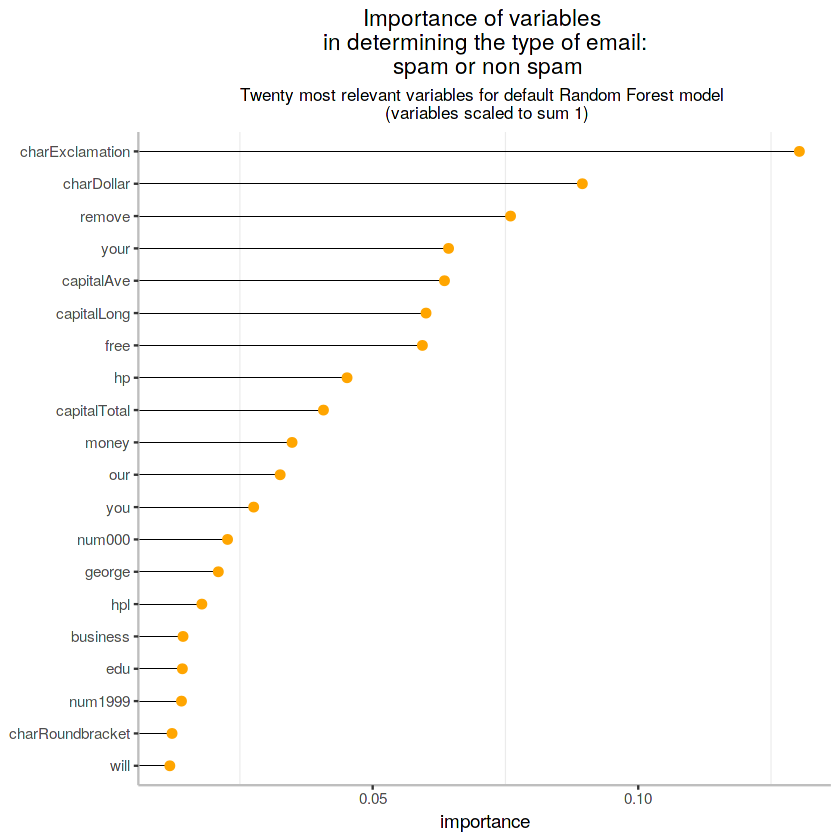

In [95]:
library(ggplot2)

data_frame(variable = imp.def$variable, importance = imp.def$MeanDecreaseGini) %>%
  mutate(importance = importance / sum(importance)) %>%
  top_n(20) %>%
  ggplot(aes(x = importance,
             y = reorder(variable, importance))) +
  labs(title = "Importance of variables \n in determining the type of email: \n spam or non spam",
       subtitle = "Twenty most relevant variables for default Random Forest model \n (variables scaled to sum 1)") +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        axis.line = element_line(colour = "grey"),
        panel.grid.major = element_blank(), panel.border = element_blank()) +
  geom_segment(aes(x = -Inf, y = reorder(variable, importance),
                   xend = importance, yend = reorder(variable, importance)),
               size = 0.2) + 
  geom_point(color = "orange", cex = 2)

### 3. Calculate the importance of spam variables for stumps RF

In [84]:
(rf.d1 <- randomForest(type ~ ., data = learn, maxnodes = 2))


Call:
 randomForest(formula = type ~ ., data = learn, maxnodes = 2) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 17.17%
Confusion matrix:
        nonspam spam class.error
nonspam    1932   20   0.0102459
spam        533  736   0.4200158

In [86]:
# ?importance
imp.d1 <- as.data.frame(importance(rf.d1))
imp.d1$variable <- rownames(imp.d1)

# See top 20 most important variables
arrange(imp.d1, desc(MeanDecreaseGini))[1:20,]

MeanDecreaseGini,variable
64.301241,charDollar
42.598855,charExclamation
39.150650,remove
32.699291,free
27.944416,capitalAve
27.806511,your
19.930254,money
19.842940,capitalLong
11.904380,num000
11.412404,our


Selecting by importance


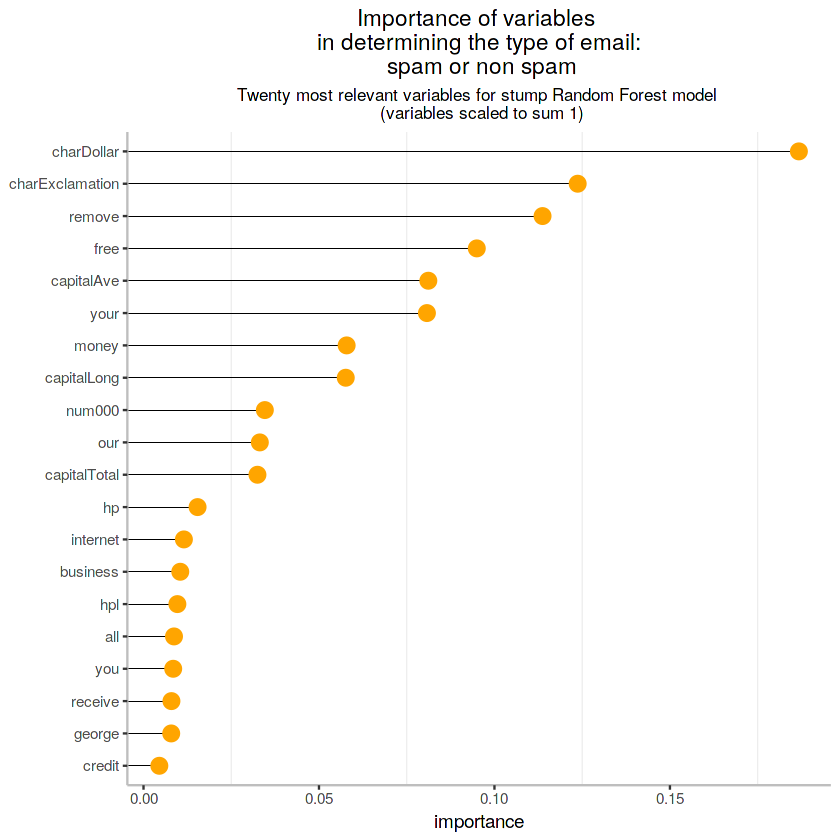

In [94]:
data_frame(variable = imp.d1$variable, importance = imp.d1$MeanDecreaseGini) %>%
  mutate(importance = importance / sum(importance)) %>%
  top_n(20) %>%
  ggplot(aes(x = importance,
             y = reorder(variable, importance))) +
  labs(title = "Importance of variables \n in determining the type of email: \n spam or non spam",
       subtitle = "Twenty most relevant variables for stump Random Forest model \n (variables scaled to sum 1)") +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        axis.line = element_line(colour = "grey"),
        panel.grid.major = element_blank(), panel.border = element_blank()) +
  geom_segment(aes(x = -Inf, y = reorder(variable, importance),
                   xend = importance, yend = reorder(variable, importance)),
               size = 0.2) + 
  geom_point(color = "orange", cex = 2)

### 4. Illustrate the influence of the mtry parameter on the OOB error and on the VI

## 5. Variable selection using random forests

### 1. Load the library **VSURF**

In [41]:
library(VSURF)

### 2. Apply **VSURF** on a subset of 500 observations of the data table spam.app

In [75]:
# Subset spam data using stratified sampling
spam.app <- 
  spam %>%
  group_by(type) %>%
  sample_n(250)

In [76]:
# Apply VSURF
vsurf.spam <- VSURF(type ~ ., data = spam.app, parallel = TRUE, clusterType = "FORK", ncores = detectCores() - 1)

Warning message in VSURF.formula(type ~ ., data = spam.app, parallel = TRUE, clusterType = "FORK", :
“VSURF with a formula-type call outputs selected variables
which are indices of the input matrix based on the formula:
you may reorder these to get indices of the original data”

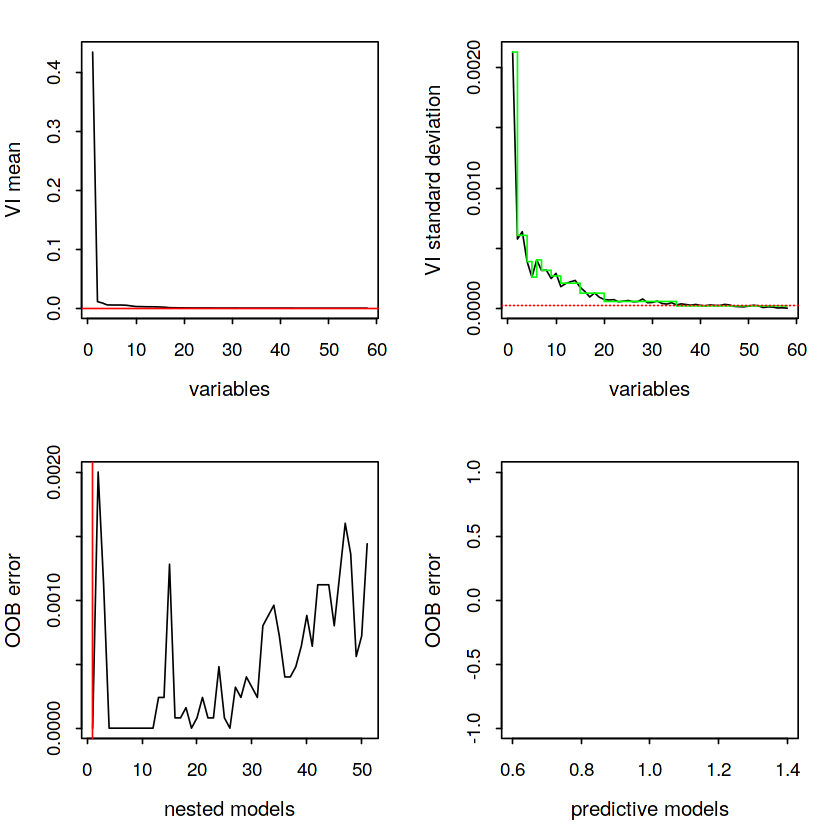

In [77]:
plot(vsurf.spam, cex.axis = 1.1, cex.lab = 1.2)

### 3. Comment on the results of the different steps

In [78]:
summary(vsurf.spam)


 VSURF computation time: 1.3 mins 

 VSURF selected: 
	51 variables at thresholding step (in 17.8 secs)
	1 variables at interpretation step (in 57.3 secs)
	1 variables at prediction step (in 0.8 secs)

 VSURF ran in parallel on a FORK cluster and used 7 cores 


In [79]:
# Thresholding variables
colnames(spam.app[vsurf.spam$varselect.thres])

[1] "type"              "hp"                "money"            
 [4] "george"            "remove"            "charDollar"       
 [7] "charExclamation"   "free"              "capitalAve"       
[10] "capitalTotal"      "edu"               "capitalLong"      
[13] "hpl"               "num000"            "your"             
[16] "num1999"           "our"               "you"              
[19] "business"          "over"              "num85"            
[22] "internet"          "will"              "meeting"          
[25] "email"             "num650"            "order"            
[28] "credit"            "lab"               "receive"          
[31] "re"                "telnet"            "labs"             
[34] "charRoundbracket"  "data"              "pm"               
[37] "charSemicolon"     "addresses"         "mail"             
[40] "charSquarebracket" "project"           "charHash"         
[43] "technology"        "original"          "address"          
[46] "all"               "num415"            "num857"           
[49] "cs"                "font"              "people"

In [80]:
# Interpretation variables
colnames(spam.app[vsurf.spam$varselect.interp])

[1] "type"

In [81]:
# Prediction variables
colnames(spam.app[vsurf.spam$varselect.pred])

[1] "type"

#### Stump RF model

In [83]:
vsurf.stump <- VSURF(type ~ ., spam.app, maxnodes = 2, parallel = TRUE, clusterType = "FORK", ncores = detectCores() - 1)

Warning message in VSURF.formula(type ~ ., spam.app, maxnodes = 2, parallel = TRUE, :
“VSURF with a formula-type call outputs selected variables
which are indices of the input matrix based on the formula:
you may reorder these to get indices of the original data”

In [88]:
summary(vsurf.stump)


 VSURF computation time: 40.6 secs 

 VSURF selected: 
	58 variables at thresholding step (in 8.5 secs)
	1 variables at interpretation step (in 31.6 secs)
	1 variables at prediction step (in 0.5 secs)

 VSURF ran in parallel on a FORK cluster and used 7 cores 


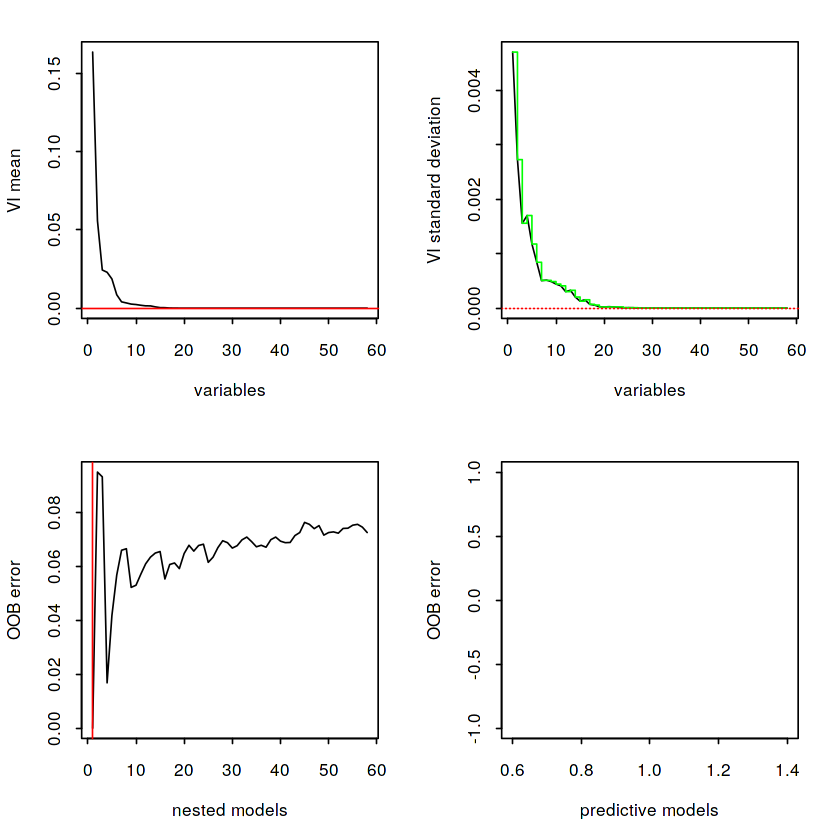

In [97]:
plot(vsurf.stump)

### 4. Experiment with the parallel version based on the article on **VSURF**

In [109]:
# Try different thresholds values (tuning the function)

# Number of forest to grown values for each step (from 10 to 100)
nfor.thres.values <- seq(0, 100, by = 10)[-1]
nfor.interp.values <- seq(0, 100, by = 10)[-1]
nfor.pred.values <- seq(0, 100, by = 10)[-1]

# All combinations for the different nfor values in each step

list.nfor.thres <- lapply(nfor.thres.values, function(x) {
    message(paste0("\n Calculating VSURF with nfor.thres = ", x))
    VSURF(type ~ ., data = spam.app, nfor.thres = x, parallel = TRUE, clusterType = "PSOCK", ncores = detectCores() - 1)
})

Calculating VSURF with nfor.thres = 10
Warning message in VSURF.formula(type ~ ., data = spam.app, nfor.thres = x, parallel = TRUE, :
“VSURF with a formula-type call outputs selected variables
which are indices of the input matrix based on the formula:
you may reorder these to get indices of the original data”Calculating VSURF with nfor.thres = 20
Warning message in VSURF.formula(type ~ ., data = spam.app, nfor.thres = x, parallel = TRUE, :
“VSURF with a formula-type call outputs selected variables
which are indices of the input matrix based on the formula:
you may reorder these to get indices of the original data”Calculating VSURF with nfor.thres = 30
Warning message in VSURF.formula(type ~ ., data = spam.app, nfor.thres = x, parallel = TRUE, :
“VSURF with a formula-type call outputs selected variables
which are indices of the input matrix based on the formula:
you may reorder these to get indices of the original data”Calculating VSURF with nfor.thres = 40
Warning message in VSURF.for

In [118]:

number.threshold.vars <- lapply(1:9, function(x) {
    message(paste0("\n Getting number of threshold variables for "), nfor.thres.values[x])
    length(list.nfor.thres[[x]]$varselect.thres)
})

number.threshold.vars


 Getting number of threshold variables for 10

 Getting number of threshold variables for 20

 Getting number of threshold variables for 30

 Getting number of threshold variables for 40

 Getting number of threshold variables for 50

 Getting number of threshold variables for 60

 Getting number of threshold variables for 70

 Getting number of threshold variables for 80

 Getting number of threshold variables for 90


[[1]]
[1] 49

[[2]]
[1] 51

[[3]]
[1] 51

[[4]]
[1] 54

[[5]]
[1] 54

[[6]]
[1] 56

[[7]]
[1] 53

[[8]]
[1] 54

[[9]]
[1] 53

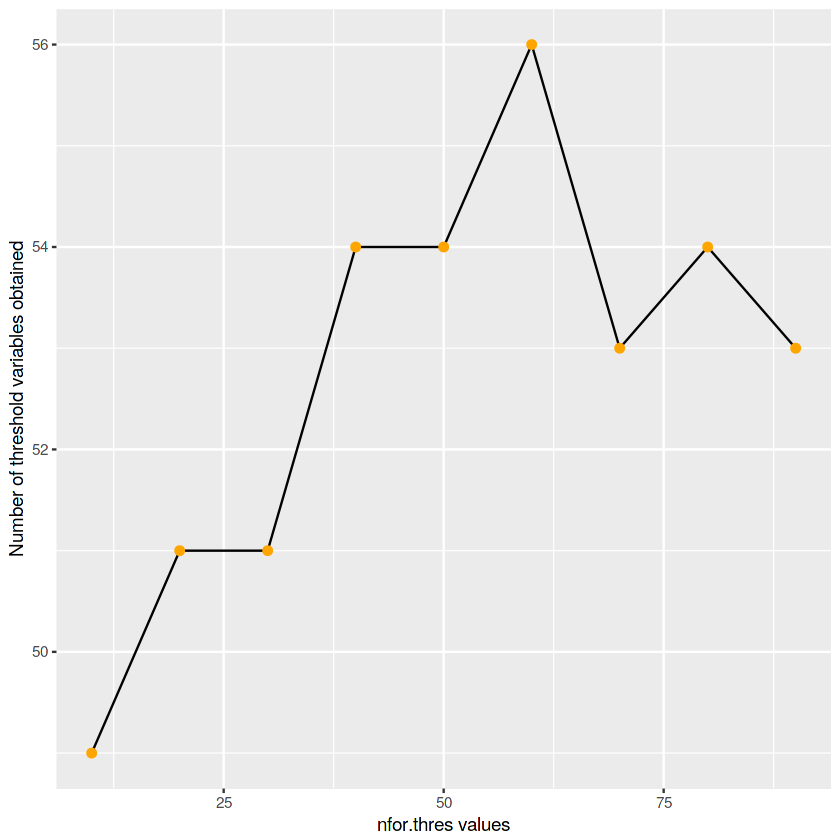

In [139]:
# Make a plot with number of thresholds variables vs number of forest threshold (nfor.thres)
ggplot()  + 
  geom_line(aes(x = nfor.thres.values[-10], y = unlist(number.threshold.vars))) + 
  geom_point(aes(x = nfor.thres.values[-10], y = unlist(number.threshold.vars)), color = "orange", cex = 2) + 
  labs(x = "nfor.thres values", y = "Number of threshold variables obtained")


In [122]:
# Para cada combinación hacer un plot que muestre el número de threshold variables, interpretation variables and predicted variables
# Buscar las variables que se repiten 

ERROR: Error in parse(text = x, srcfile = src): <text>:8:0: unexpected end of input
6: # Para cada combinación hacer un plot que muestre el número de threshold variables, interpretation variables and predicted variables
7: # Buscar las variables que se repiten 
  ^


In [96]:
?VSURF

VSURF {VSURF},R Documentation
"x, formula","A data frame or a matrix of predictors, the columns represent the variables. Or a formula describing the model to be fitted."
...,others parameters to be passed on to the randomForest function (see ?randomForest for further information).
y,A response vector (must be a factor for classification problems and numeric for regression ones).
ntree,Number of trees in each forests grown. Standard parameter of randomForest.
mtry,Number of variables randomly sampled as candidates at each split. Standard parameter of randomForest.
nfor.thres,"Number of forests grown for ""thresholding step"" (first of the three steps)."
nmin,"Number of times the ""minimum value"" is multiplied to set threshold value."
nfor.interp,"Number of forests grown for ""intepretation step"" (second of the three steps)."
nsd,Number of times the standard deviation of the minimum value of err.interp is multiplied.
nfor.pred,"Number of forests grown for ""prediction step"" (last of the three steps)."


In [ ]:
# Make a combination of diferent thresholds and create a raster view 